In [1]:
# !pip install pandas 



## Introduction of Spam:

Spam refers to unsolicited and often irrelevant or inappropriate messages sent in bulk, typically via email or other digital communication channels. These messages are often commercial in nature, promoting products, services, or fraudulent schemes. Spam messages are sent without the recipient's consent, causing annoyance and cluttering inboxes.


## Spam Classifier:

A spam classifier is a machine learning model or algorithm designed to automatically detect and filter spam messages from legitimate ones. It analyzes the content and characteristics of incoming messages, such as emails or text messages, and assigns them a probability score of being spam or not. The classifier uses features like keywords, patterns, and sender information to distinguish between spam and non-spam messages, helping users manage their communications effectively and reduce the impact of spam in their daily interactions.

# Import Dependencies

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier , VotingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score , f1_score
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
from collections import  Counter
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [4]:
#laoding dataset
data=pd.read_csv("Spam.csv" , encoding="latin-1")

## looking at data

In [5]:
data.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3323,ham,I don wake since. I checked that stuff and saw...,NaN,NaN,NaN
476,ham,Love you aathi..love u lot..,NaN,NaN,NaN


In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

we can clearly see that , last 3 columns have most of the missing values , its better to drop those columns

## Data Cleaning

In [11]:
data.drop(columns=["Unnamed: 2","Unnamed: 3" , "Unnamed: 4"] , inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


note* : ham ===> not spam 

In [12]:
data.rename(columns={"v1": "category" , "v2":"Sms"},inplace=True)
data

,category,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**most of the machine learning model do not operate on textual input as a feature , so we need to convert our category in to numeri values**

    for ham it will be : 0
    for spam it will be : 1

In [14]:
label_en = LabelEncoder()
data["category"]=label_en.fit_transform(data["category"])

In [15]:
data.head(5)

,category,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


    -1 for `spam` 
    -0  for `not spam /ham`

**checking duplicated values**

In [16]:
data.duplicated().sum()

403

In [17]:
data=data.drop_duplicates() # dropping duplicated values

In [18]:
data.shape

(5169, 2)

duplicated values have been deleted.

## Visualizing the data

<Axes: xlabel='category', ylabel='count'>

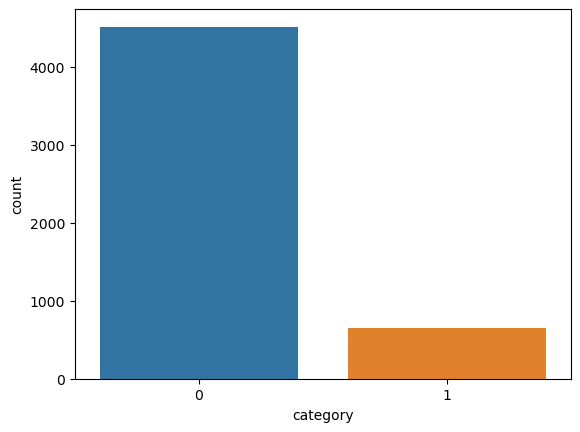

In [19]:
import seaborn as sns
sns.countplot(data=data  , x = "category")

most of the messages are not spam 

In [23]:
values=data["category"].value_counts()

In [26]:
values

0    4516
1     653
Name: category, dtype: int64

In [31]:
print(f"total number of spams are {values[1]}")
print(f"total number of hams are {values[0]}")

total number of spams are 653
total number of hams are 4516


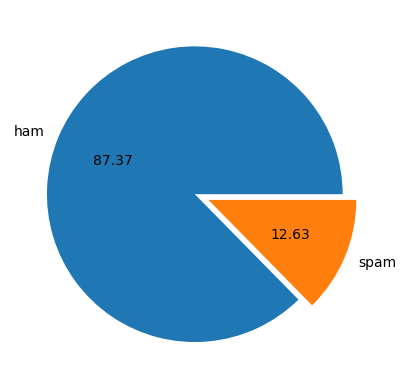

In [32]:
plt.pie(values , labels=["ham" , "spam"] , autopct="%0.2f" ,explode=(0,0.1) )
plt.show()

### Obsrevations:

    1.Having Less Spam Messages in Dataset

    2.by looking our data its very clear that our data is imbalnce

## Feature Engineering 

    adding some new features

In [36]:
data["total_char"] = data["Sms"].apply(len)

In [37]:
data.sample(2)

,category,Sms,total_char
188,0,Have you got Xmas radio times. If not i will g...,55
618,0,I come n pick Ì_ up... Come out immediately af...,60


We have a DataFrame named "data," which contains a column labeled "Sms." The objective is to tokenize the text in the "Sms" column, i.e., to break down each SMS message into individual words or tokens.

In [38]:
data["total_words"]=data["Sms"].apply(lambda x: len(nltk.word_tokenize(x)))

The lambda function takes an input x, which represents each SMS message in the "Sms" column. The function inside the lambda, nltk.word_tokenize(x), performs the tokenization of the SMS message x.

nltk.word_tokenize(x): The nltk.word_tokenize function is part of the Natural Language Toolkit (NLTK) library. It is used to break down a text (string) into individual words or tokens. NLTK is a popular Python library for working with human language data and provides various tools for natural language processing tasks.

In [41]:
data.sample(2)

,category,Sms,total_char,total_words
2186,0,So is there anything specific I should be doin...,104,20
1176,0,"Did he say how fantastic I am by any chance, o...",167,41


In [42]:
data["Sms"].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Sms, Length: 5169, dtype: object

In [43]:
data["total_sentence"] = data["Sms"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
data.sample(2)

,category,Sms,total_char,total_words,total_sentence
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",161,29,1
1175,0,Horrible u eat macs eat until u forgot abt me ...,150,38,3


In [47]:
 data.describe() # Statistical Analysis for  Data


,category,total_char,total_words,total_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [48]:
#ham messages
ham_message = data[data["category"]==0][["Sms","total_char","total_words","total_sentence"]]

In [49]:
#spam messages
spam_message = data[data["category"]!=0][["Sms" , "total_char","total_words","total_sentence"]]

#### Histogram Plot

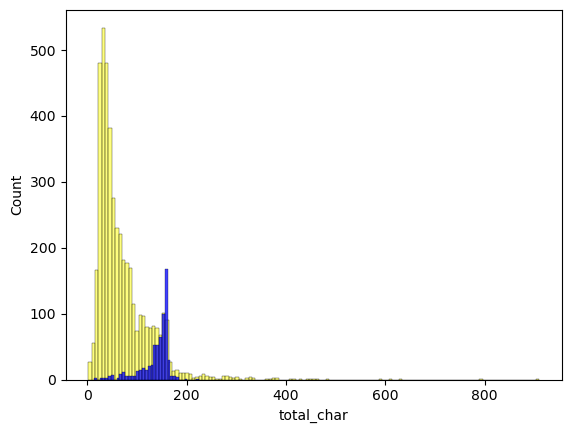

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ham_message["total_char"] , color = "yellow"  , alpha= 0.5)
sns.histplot(spam_message["total_char"] , color = "blue") 
plt.show()


#### pairplot 

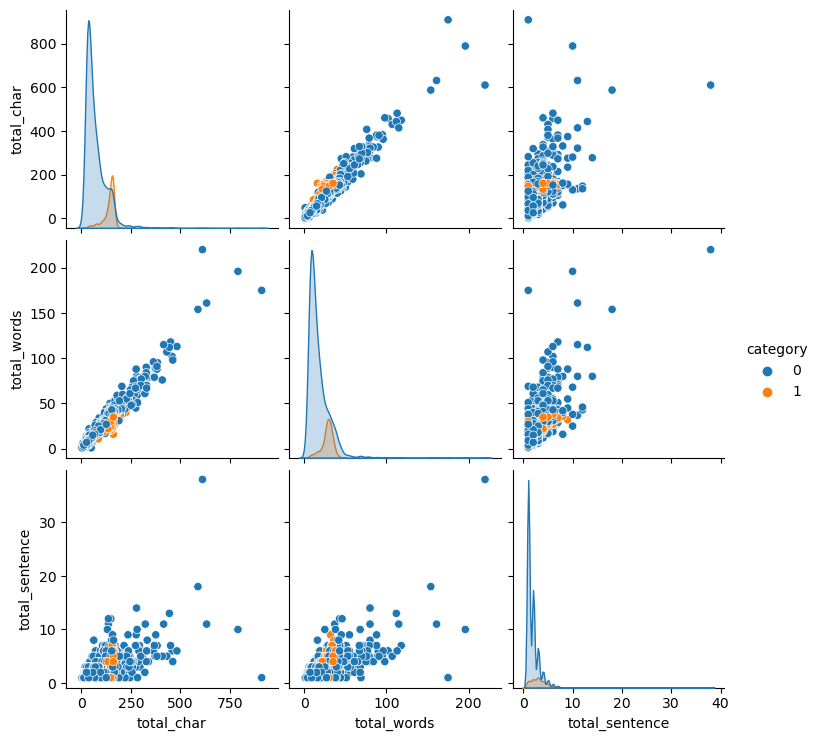

In [52]:
sns.pairplot(data , hue = "category")

<Axes: >

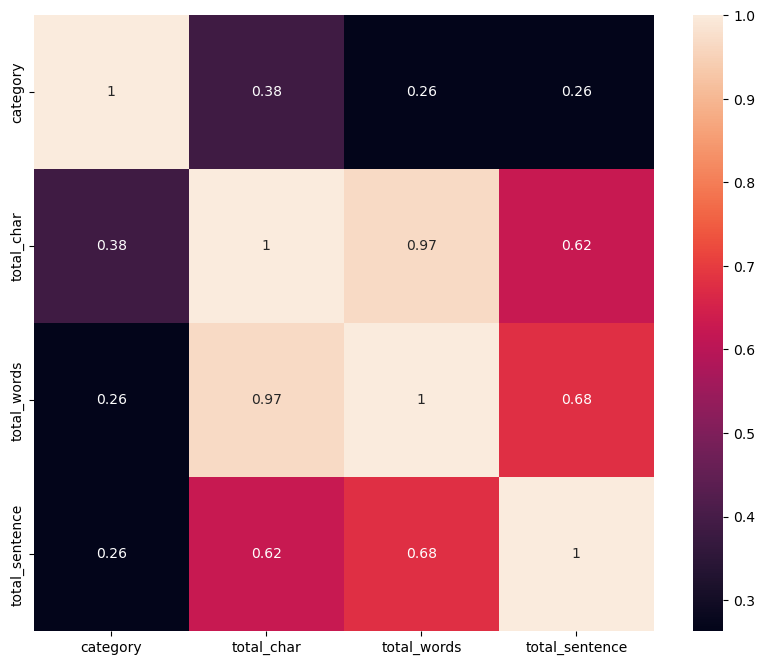

In [53]:
fig,(ax1) = plt.subplots(1,1, figsize=(10, 8))
sns.heatmap(data.corr() , annot = True)

### Observations:
    1.Ham Characters and Words are more than Spam
    2.Outliers are present
    3."Characters" and "Word" have a moderately strong positive correlation of 0.97


# Data (Text) Preprocessing

    -lower case
    -Tokenisation
    -removing Special charecter
    -removing stop word and pantuation
    -Stemming(removing similar words)

### checking stopwords


In [54]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
ps = PorterStemmer()
print(ps.stem("helloing")) # print only root word
print(ps.stem("dance"))

hello
danc


In [57]:
def transform_sms (Sms):
    Sms = Sms.lower() 
    words = nltk.word_tokenize(Sms) # tokenizing , making a list of every words in a sentence
    word_list1=[]
    word_list2=[]
    word_list3=[]
    
    for word in words:
        if word.isalnum():  # removing special chaercters
            word_list1.append(word)
            
    for word in word_list1:
        if word not in stopwords.words("english"): # removing stopwords 
            word_list2.append(word)
            
    for word  in word_list2:
        word_list3.append(ps.stem(word)) # stemming out the words
                
                
                 
            
    
    return " ".join(word_list3) # will join all the words and make a sentence

In [59]:
# just for my learning
# transform_sms("HIII EveryoNe , My nAMe is are so because on the sawan _ rawat and i earn in $ dollar , do you missing me??") 

In [60]:
data["Sms"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [61]:
transform_sms(data["Sms"][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

### adding our tranfirmed_sms to out dataframe

In [62]:
data["transform_sms"]=data["Sms"].apply(transform_sms)

In [68]:
data.sample(2)

,category,Sms,total_char,total_words,total_sentence,transform_sms
4318,0,Are you still playing with gautham?,35,7,1,still play gautham
5221,0,"Jane babes not goin 2 wrk, feel ill after lst ...",89,24,3,jane babe goin 2 wrk feel ill lst nite fone al...


# Word Cloud

### Word Cloud for spam

In [70]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height=500 , min_font_size=10 , background_color="black")
spam_wc=wc.generate(data[data["category"]==1]["transform_sms"].str.cat(sep=" "))

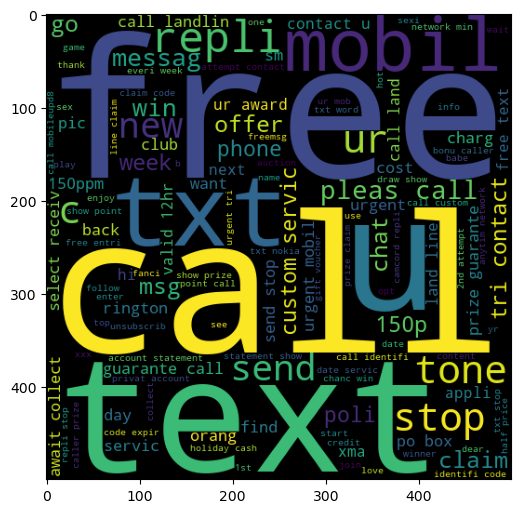

In [71]:
plt.figure(figsize=(6 ,10))
plt.imshow(spam_wc)

### Word Cloud for ham

In [72]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height=500 , min_font_size=10 , background_color="black")
ham_wc=wc.generate(data[data["category"]==0]["transform_sms"].str.cat(sep=" "))

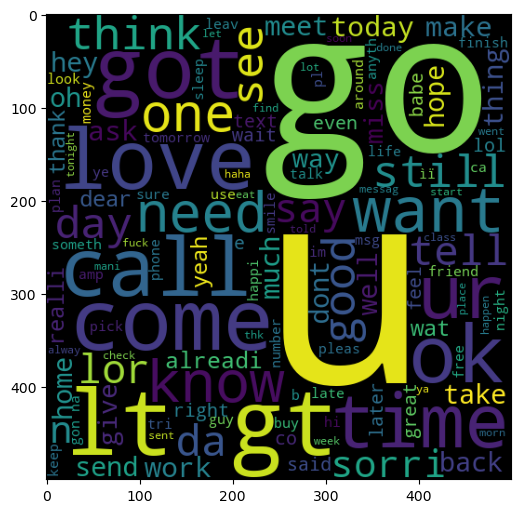

In [73]:
plt.figure(figsize=(6 ,10))
plt.imshow(ham_wc)

In [74]:
#extracting every word from the spam transform msg
spam_corpus=[]
for sms in data[data["category"]==1]["transform_sms"].tolist():
     for word in sms.split():
            spam_corpus.append(word)

In [75]:
len(spam_corpus)

9939

#### Bar plot

In [76]:
from collections import Counter
Counter(spam_corpus) # return a dictionary of words and their count

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [79]:
Counter(spam_corpus).most_common(25)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51)]

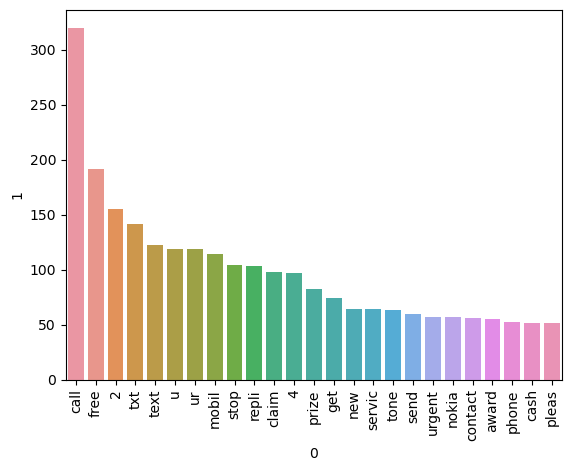

In [80]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(25))[0] ,y=pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [81]:
ham_corpus = []
for sms in data[data["category"]==0]["transform_sms"].tolist():
    for word in sms.split():
        ham_corpus.append(word)

In [82]:
len(ham_corpus)

35404

In [83]:
from collections import Counter
Counter(ham_corpus) # return a dictionary of words and their count

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [84]:
Counter(ham_corpus).most_common(25)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147)]

In [85]:
pd.DataFrame(Counter(ham_corpus).most_common(25))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


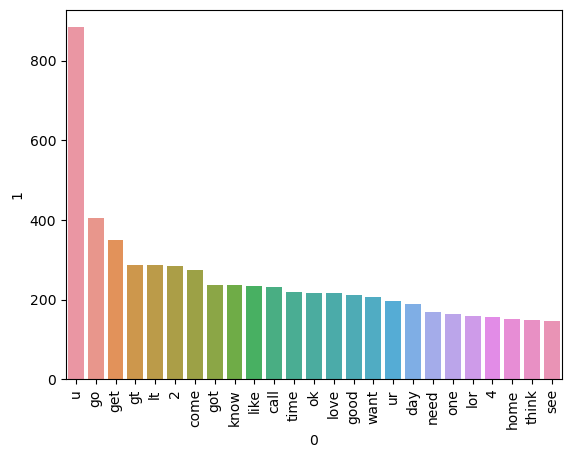

In [86]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(25))[0] , y=pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
plt.xticks(rotation="vertical")
plt.show()

# Model 

### converting text into number (vectors)== vectorization

### A. vectorization using CountVectorizer

In [89]:
cv= CountVectorizer()

In [90]:
# Independent Feature
X = cv.fit_transform(data["transform_sms"]) # it produces sparse matrix

In [92]:
X # X is in the from of sparse matrix

<5169x6708 sparse matrix of type '<class 'numpy.int64'>'
	with 40628 stored elements in Compressed Sparse Row format>

In [93]:
X = X.toarray() # converting sparse matrix into array

In [94]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
# dependent Feature

y = data["category"]

In [96]:
y.sample(2)

326    0
529    0
Name: category, dtype: int32

#### splitting dataset into train and test set

In [100]:
x_train , x_test , y_train , y_test = train_test_split(X ,y, random_state =42 , test_size = 0.2)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4135, 6708)
(1034, 6708)
(4135,)
(1034,)


**lets train our model on NAIVE BAYES**

In [102]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [103]:
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)


mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)


bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)



In [106]:
print(f"""cross_val_score of gnb {cross_val_score(gnb , x_train , y_train , cv=3).mean()}
cross_val_score of mnb {cross_val_score(mnb , x_train , y_train , cv=3).mean()}
cross_val_score of bnb {cross_val_score(bnb , x_train , y_train , cv=3).mean()}""")

cross_val_score of gnb 0.8824655056337845
cross_val_score of mnb 0.9726730664859197
cross_val_score of bnb 0.9571953762165428


as we can see above that cross_val_score is more for mnb and followed by bnb , also acuracy score is not the best way to measure , lets look for confusion matrix and precison and recall score

#### confusion matrics

In [107]:
print(f"""confusion_matrix of gnb
{confusion_matrix(y_test , gnb_pred)}
confusion_matrix of mnb 
{confusion_matrix(y_test , mnb_pred)}
confusion_matrix of bnb 
{confusion_matrix(y_test , bnb_pred)}""")

confusion_matrix of gnb
[[772 117]
 [ 19 126]]
confusion_matrix of mnb 
[[872  17]
 [ 10 135]]
confusion_matrix of bnb 
[[885   4]
 [ 31 114]]


confusion matrics of mnb looks pretty well, lets check the precison score and recall score

#### precison score and recall score

In [109]:
print(f"""
precision_score of gnb {precision_score(y_test , gnb_pred)} ,recall_score of gnb {recall_score(y_test , gnb_pred)}
precision_score of mnb {precision_score(y_test , mnb_pred)},recall_score of mnb {recall_score(y_test , mnb_pred)}
precision_score of bnb {precision_score(y_test , bnb_pred)},recall_score of bnb {recall_score(y_test , bnb_pred)}


""")


precision_score of gnb 0.5185185185185185 ,recall_score of gnb 0.8689655172413793
precision_score of mnb 0.8881578947368421,recall_score of mnb 0.9310344827586207
precision_score of bnb 0.9661016949152542,recall_score of bnb 0.7862068965517242





**lets combining scores of recall and precison** i.e **f1_score**

In [110]:
print(f"""f1_score of gnb {f1_score(y_test , gnb_pred)}
f1_score of mnb {f1_score(y_test , mnb_pred)}
f1_score of bnb {f1_score(y_test , bnb_pred)}""")

f1_score of gnb 0.6494845360824741
f1_score of mnb 0.9090909090909091
f1_score of bnb 0.8669201520912548


f1 score of mnb is best 

#### lets try another vectorization techinque using tfidfvectorizer

### B.  vectorization using tfidfvectorizer

In [111]:
tfidf=TfidfVectorizer()

In [112]:
X=tfidf.fit_transform(data["transform_sms"])
# y is already transformed

In [113]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
x_train , x_test , y_train , y_test = train_test_split(X ,y, random_state =42 , test_size = 0.2)

In [115]:
X.shape

(5169, 6708)

In [116]:
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)


mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)


bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)



cross_val_score

In [117]:
print(f"""cross_val_score of gnb {cross_val_score(gnb , x_train , y_train , cv=3).mean()}
cross_val_score of mnb {cross_val_score(mnb , x_train , y_train , cv=3).mean()}
cross_val_score of bnb {cross_val_score(bnb , x_train , y_train , cv=3).mean()}""")

cross_val_score of gnb 0.8798044690679495
cross_val_score of mnb 0.9402654300652578
cross_val_score of bnb 0.9571953762165428


confusion_matrix

In [118]:
print(f"""confusion_matrix of gnb
{confusion_matrix(y_test , gnb_pred)}
confusion_matrix of mnb 
{confusion_matrix(y_test , mnb_pred)}
confusion_matrix of bnb 
{confusion_matrix(y_test , bnb_pred)}""")

confusion_matrix of gnb
[[772 117]
 [ 24 121]]
confusion_matrix of mnb 
[[888   1]
 [ 39 106]]
confusion_matrix of bnb 
[[885   4]
 [ 31 114]]


precsion_recall_score

In [119]:
print(f"""
precision_score of gnb {precision_score(y_test , gnb_pred)} ,recall_score of gnb {recall_score(y_test , gnb_pred)}
precision_score of mnb {precision_score(y_test , mnb_pred)},recall_score of mnb {recall_score(y_test , mnb_pred)}
precision_score of bnb {precision_score(y_test , bnb_pred)},recall_score of bnb {recall_score(y_test , bnb_pred)}


""")


precision_score of gnb 0.5084033613445378 ,recall_score of gnb 0.8344827586206897
precision_score of mnb 0.9906542056074766,recall_score of mnb 0.7310344827586207
precision_score of bnb 0.9661016949152542,recall_score of bnb 0.7862068965517242





f1_score

In [120]:
print(f"""f1_score of gnb {f1_score(y_test , gnb_pred)}
f1_score of mnb {f1_score(y_test , mnb_pred)}
f1_score of bnb {f1_score(y_test , bnb_pred)}""")

f1_score of gnb 0.6318537859007832
f1_score of mnb 0.8412698412698413
f1_score of bnb 0.8669201520912548


### since our data is imbalanced , so accuracy (cross_val_score) is not that much important so we will go with precision score , also precision score of mnb using tfidf vectroization is most we will use that

    lets check on some more classification algorithm

In [145]:
svc_clf = SVC(gamma=1, C=1)  # Adjust the value of C as needed
mnb_clf = MultinomialNB(alpha=1.0)  # Adjust alpha as needed
lr_clf = LogisticRegression(C=0.5, random_state=42, max_iter=1000)  # Adjust C and max_iter as needed
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # Adjust max_depth as needed
for_clf = RandomForestClassifier(n_estimators=60, random_state=42)  # Adjust n_estimators as needed


In [146]:
classifier={
    "svc":svc_clf,
    "mnb":mnb_clf,
    "lr":lr_clf,
    "tree":tree_clf,
    "forest": for_clf
}

In [147]:
# Creating a function train each model and calculate/return accuracy and precision

def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    precision = precision_score(y_test, y_pred)
    cross_val_scoring = cross_val_score(clf, x_train, y_train, cv=3).mean()
    return precision, cross_val_scoring

precision_scores = []
cross_val_scores = []

for name, clf in classifier.items():
    current_precision, current_cross_val_score = train_classifier(clf, x_train, x_test, y_train, y_test)
    print("For", name)
    print("Precision Score:", current_precision)
    print("Cross-Val Score:", current_cross_val_score)
    
    precision_scores.append(current_precision)
    cross_val_scores.append(current_cross_val_score)


For svc
Precision Score: 0.9912280701754386
Cross-Val Score: 0.9620313760242887
For mnb
Precision Score: 0.9906542056074766
Cross-Val Score: 0.9402654300652578
For lr
Precision Score: 0.922077922077922
Cross-Val Score: 0.9088253795178419
For tree
Precision Score: 0.8315789473684211
Cross-Val Score: 0.9267223852991501
For forest
Precision Score: 0.9913793103448276
Cross-Val Score: 0.9627575916724466


## Algorithms: Accuracy and Precision

In [128]:
performance_df = pd.DataFrame({'Algorithm':classifier.keys(),'cross_val_scores':cross_val_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,cross_val_scores,Precision
4,forest,0.962758,0.991379
0,svc,0.962031,0.991228
1,mnb,0.940265,0.990654
2,lr,0.908825,0.922078
3,tree,0.939056,0.812030


we can see that SVC and NB(mnb) performed the best , we can rely our model on one of the them ,

### Observations:

    Multinomial NB has an accuracy of 94% and a precision of 99.0654%.
    
    Random Forest has an accuracy of 96.27% and a precision of 99.1379%.
    
    SVC (Support Vector Classifier) has an accuracy of 96.20% and a precision of 99.1228%.
    
    Logistic Regression has an accuracy of 90.88% and a precision of 92.2078%.
    
    Decision Tree has an accuracy of 93.90% and a precision of 81.20%.


## VotingClassifier

### before finalizing lets try VotingClassifier, which is combination of the top 3 classifiers above

In [131]:
voting = VotingClassifier(estimators=[("SVM" ,svc_clf) , ("NB",mnb_clf) ,("RF",for_clf) ] ,voting="hard" )

In [132]:
voting.fit(x_train , y_train)

VotingClassifier(estimators=[('SVM', SVC(C=1, gamma=1)),
                             ('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=60,
                                                     random_state=42))])

In [133]:
voting_pred = voting.predict(x_test)
print(f"precision score: {precision_score(voting_pred, y_test)}")

precision score: 0.7793103448275862


our precision score is reduced hence VotingClassifier is not a good approch

## the best model i think is Randomforest with tfidf vectorization , with whom iam going to proceed further 

In [143]:
for_clf = RandomForestClassifier(n_estimators=60, random_state=42)  # Adjust n_estimators as needed
for_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

## Pickle Files

In [144]:
import pickle
pickle.dump(tfidf,open("vectorizers_updated.pkl","wb"))
pickle.dump(for_clf,open("model_updated.pkl","wb"))